# Predictive model to forecast sales of supermarket

#  Problem Statement 

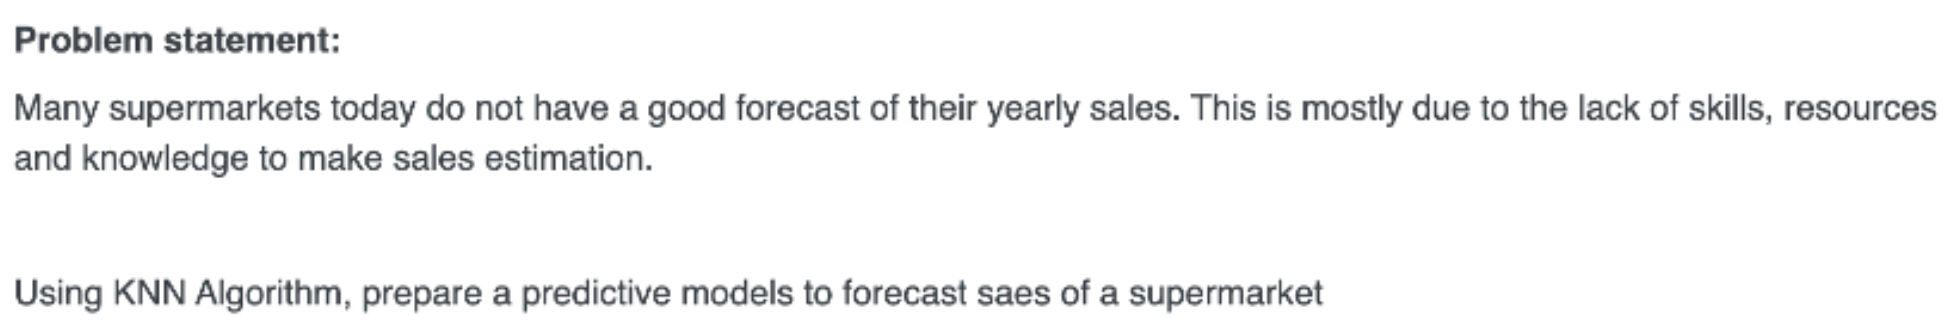

# Dataset (Attribute Information)

Source - https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales

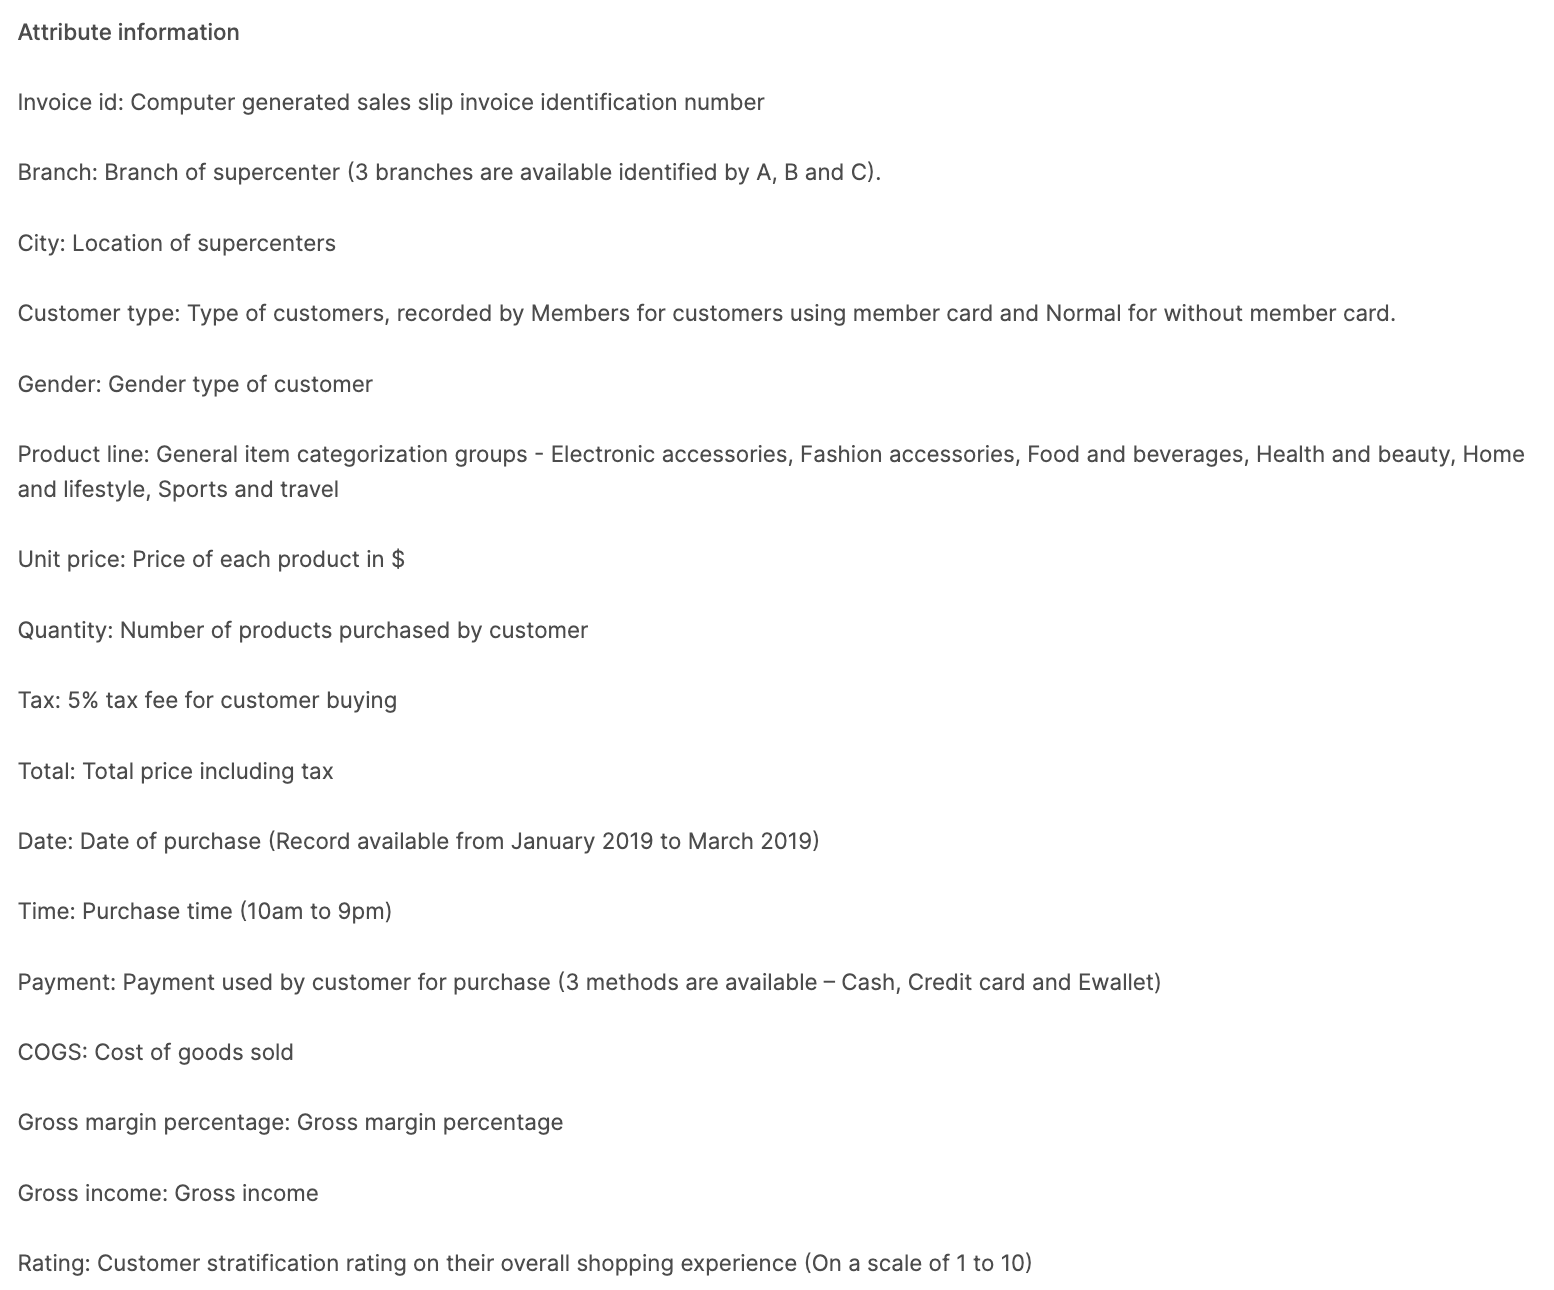

# Solution

# 1. Data Cleaning

**Import Libraries**

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)


**Read Data**

In [2]:
# Read data file

data = pd.read_csv('supermarket_sales.csv')
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


**Basic Information about dataset**

In [3]:
print(data.shape)
print('Number of rows are :',data.shape[0], ',and number of columns are :',data.shape[1])


(1000, 17)
Number of rows are : 1000 ,and number of columns are : 17


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

**Missing Values**

In [5]:
missing_values = data.isnull().sum()
missing_values

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

**Data Types**

In [6]:
data.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

We change the data type for Date and Time Objects

In [7]:
# Change data type of Date and Time as they r recognised as categorical
from datetime import datetime

data['Date'] = pd.to_datetime(data['Date'])
data['Time'] = pd.to_datetime(data['Time'])


print(data['Date'].dtype)
print(data['Time'].dtype)



datetime64[ns]
datetime64[ns]


**Descriptive/Statistical Summary of Dataset**

In [8]:
# All numerical columns by default

data.describe()   

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [9]:
# All categorical columns

data.describe(include='O')   

,Invoice ID,Branch,City,Customer type,Gender,Product line,Payment
count,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,3
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,Ewallet
freq,1,340,340,501,501,178,345


**Rename Column**

In [10]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

Total feature refers to sales price which we want to predict hence we rename this feature to Sales_price 

In [11]:
# Rename Feature (Sales will be target variable)

data.rename(columns={"Total": "Sales_amount"},inplace=True)  

# Move Sales target variable to last column

In [12]:
# Drop redundant feature (as Invoice_id does not add any value to modelling)
df=data.drop(['Invoice ID'],axis=1)


# 2. Exploratory Data Analysis

In [13]:
# Unique Values in each categorical column-
cat_cols = ['Branch','City','Customer type','Gender','Product line','Payment']

for i in df[cat_cols]:
    print("\033[1m" + i + "\033[0m")
    print('Unique values:',df[i].unique())
    print('Total unique values:',df[i].nunique(),'\n')
    

Branch
Unique values: ['A' 'C' 'B']
Total unique values: 3 

City
Unique values: ['Yangon' 'Naypyitaw' 'Mandalay']
Total unique values: 3 

Customer type
Unique values: ['Member' 'Normal']
Total unique values: 2 

Gender
Unique values: ['Female' 'Male']
Total unique values: 2 

Product line
Unique values: ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']
Total unique values: 6 

Payment
Unique values: ['Ewallet' 'Cash' 'Credit card']
Total unique values: 3 



### Univariate plots to check distribution of Categorical Variables - Count Plots

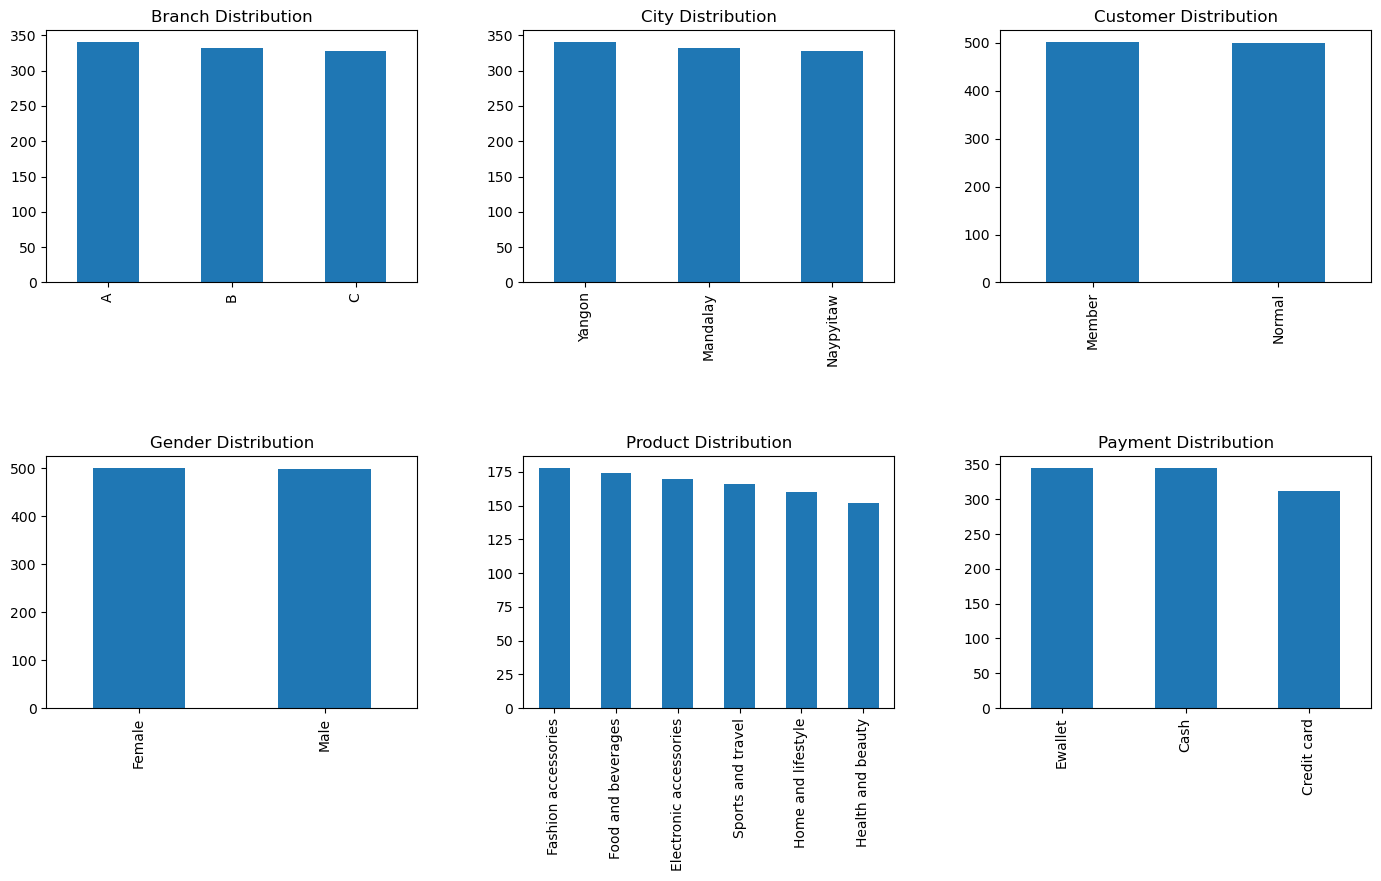

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2,ncols=3,figsize=(15,10))


df['Branch'].value_counts().plot(kind='bar',title=('Branch Distribution'),ax=ax[0,0])
df['City'].value_counts().plot(kind='bar',title=('City Distribution'), ax=ax[0,1])
df['Customer type'].value_counts().plot(kind='bar',title=('Customer Distribution'), ax=ax[0,2])
df['Gender'].value_counts().plot(kind='bar',title=('Gender Distribution'), ax=ax[1,0])
df['Product line'].value_counts().plot(kind='bar',title=('Product Distribution'), ax=ax[1,1])
df['Payment'].value_counts().plot(kind='bar',title=('Payment Distribution'), ax=ax[1,2])
fig.tight_layout(pad=5.0)
plt.show()


**Insights**
- From above plots we see that Branch, City, Customer type and gender seem to be uniformly distributed.
- For Product line, Fashion accessories seem to be have better counts than other categories.
- Payment by Credit card is slightly less than as compared to payment via Ewallet or Cash.

### Distribution of Target Variable Sales - Boxplot

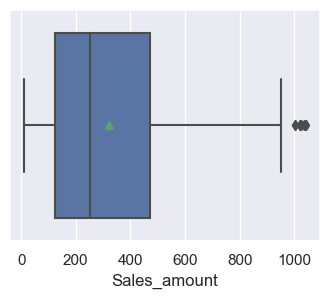

In [15]:
sns.set(rc={"figure.figsize":(4, 3)}) #width=4, #height=3
sns.boxplot(x = df.Sales_amount, showmeans = True)  
plt.show()


**Insights**

We see that Median is not exactly at center of box/IQR, meaning Sales_amount is bit skewed. 
Mean sale price is around 300.

# 3. Feature Engineering / Selection


**Correlation Matrix to check for Multicollinearity**

Multicollinearity is the occurrence of high intercorrelations among two or more independent variables in a multiple regression model, multicollinearity is a problem because it will make the statistical inferences less reliable.

In [16]:
corr_matrix = df.corr()
corr_matrix

/var/folders/1j/6bqwtp0x00z_279498pht7ym0000gn/T/ipykernel_5194/2355143037.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,Unit price,Quantity,Tax 5%,Sales_amount,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Sales_amount,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


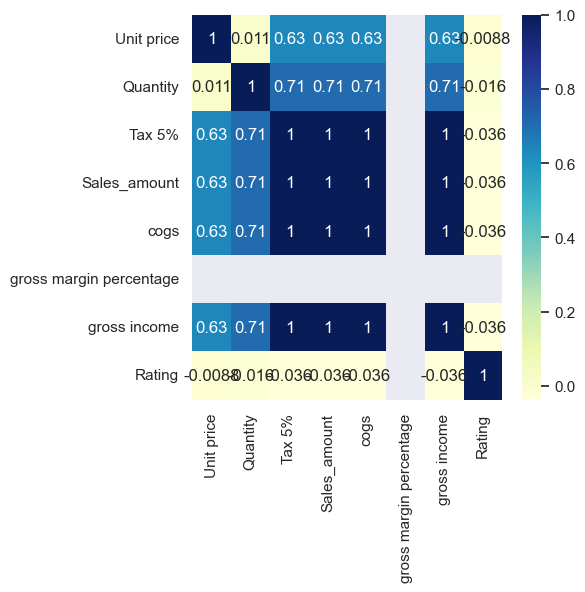

In [17]:
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(corr_matrix, cmap="YlGnBu",annot=True);


- Checking correlation amoong independent variables, if highly correlated means either of them can be removed.
- Unit Price is high correlated with tax, cogs, gross income.
- Quantity is high correlated with tax, cogs, gross income.
- tax, cogs and gross income are also correlated.
- Based on above correlations we remove features - tax,cogs,gross income & gross income%.

Date and Time Features extraction so can be used for ML modelling.

In [18]:
# Date features extraction
from datetime import datetime as dt
df["Day"]=df["Date"].dt.day_name()
df["Month"]=df["Date"].dt.month_name()
df["Weekday"]=df.Date.dt.weekday

# Time features extraction
df['Hour'] = df['Time'].dt.hour  

In [19]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales_amount,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Weekday,Hour
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2023-02-09 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,January,5,13
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2023-02-09 10:29:00,Cash,76.40,4.761905,3.8200,9.6,Friday,March,4,10
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2023-02-09 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Sunday,March,6,13
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2023-02-09 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,January,6,20
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2023-02-09 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Friday,February,4,10


Now since we have extracted day,month, weekday, hour features, we drop the original Date and Time Columns. 

**Drop features based on Correlation Matrix and Datetime**

In [20]:
df1 = df.drop(['Date','Time','Tax 5%','cogs','gross income','gross margin percentage'],axis=1)
df1.columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Sales_amount', 'Payment', 'Rating', 'Day',
       'Month', 'Weekday', 'Hour'],
      dtype='object')

# 4. Modelling

**Encoding Categorical Variables**

Since ML model will accept only numerical values hence we encode categorical variables present in the dataset.

In [21]:
# Binary Variables - Customer type and Gender
df1['Customer type'] = df1['Customer type'].replace({'Member':1, 'Normal':0})
df1['Gender'] = df1['Gender'].replace({'Female':1, 'Male':0})


In [22]:
# Multi-class variables - Branch, City, Product line, Payment

df1_ohe = pd.get_dummies(df1)

In [23]:
# Moving target variable to last column of dataframe
df1_ohe = df1_ohe.reindex(columns = [col for col in df1_ohe.columns if col != 'Sales_amount'] + ['Sales_amount'])
df1_ohe.head()

,Customer type,Gender,Unit price,Quantity,Rating,Weekday,Hour,Branch_A,Branch_B,Branch_C,City_Mandalay,City_Naypyitaw,City_Yangon,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Month_February,Month_January,Month_March,Sales_amount
0,1,1,74.69,7,9.1,5,13,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,548.9715
1,0,1,15.28,5,9.6,4,10,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,80.2200
2,0,0,46.33,7,7.4,6,13,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,340.5255
3,1,0,58.22,8,8.4,6,20,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,489.0480
4,0,0,86.31,7,5.3,4,10,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,634.3785


**Split into Features and Target**

In [24]:
X = df1_ohe.drop('Sales_amount', axis = 1)
y = df1_ohe['Sales_amount']

In [25]:
X.head()   # Features

,Customer type,Gender,Unit price,Quantity,Rating,Weekday,Hour,Branch_A,Branch_B,Branch_C,City_Mandalay,City_Naypyitaw,City_Yangon,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Month_February,Month_January,Month_March
0,1,1,74.69,7,9.1,5,13,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
1,0,1,15.28,5,9.6,4,10,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,0,0,46.33,7,7.4,6,13,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
3,1,0,58.22,8,8.4,6,20,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
4,0,0,86.31,7,5.3,4,10,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0


In [26]:
y.head()     # Target

0    548.9715
1     80.2200
2    340.5255
3    489.0480
4    634.3785
Name: Sales_amount, dtype: float64

**Train-Test Split**

In [27]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=230105)

**KNN Modelling - Set KNN Parameters- Neighbors, metric and weight**

In [28]:
# 1. Import
from sklearn.neighbors import KNeighborsRegressor

# 2. Instantiate with default parameters
model_knn = KNeighborsRegressor(n_neighbors=5, weights='uniform',metric='minkowski')

# 3. Fit
model_knn.fit(x_train, y_train)

# 4. Predict
y_pred = model_knn.predict(x_test)

# 5. Evaluate

from sklearn import metrics
print('MSE: %.2f' % (metrics.mean_squared_error(y_test, y_pred)))
print('R2_score: %.2f' % (metrics.r2_score(y_test, y_pred)))


MSE: 3265.09
R2_score: 0.94


#### <font color=blue>*R2_score with default parameters = 0.94*

# 5. Hyperparameter Tuning

Grid Search for Optimal HyperParameters

**Combinations for Hyperparameter Tuning**

In [29]:
params = {'n_neighbors':list(range(2,8)),
          'weights':['uniform','distance'],
          'metric':['minkowski','manhattan','euclidean']}
        

for x in params['n_neighbors']:
    for y in params['weights']:
        for z in params['metric']:
              print(x, y, z)
    print('-'*20)

2 uniform minkowski
2 uniform manhattan
2 uniform euclidean
2 distance minkowski
2 distance manhattan
2 distance euclidean
--------------------
3 uniform minkowski
3 uniform manhattan
3 uniform euclidean
3 distance minkowski
3 distance manhattan
3 distance euclidean
--------------------
4 uniform minkowski
4 uniform manhattan
4 uniform euclidean
4 distance minkowski
4 distance manhattan
4 distance euclidean
--------------------
5 uniform minkowski
5 uniform manhattan
5 uniform euclidean
5 distance minkowski
5 distance manhattan
5 distance euclidean
--------------------
6 uniform minkowski
6 uniform manhattan
6 uniform euclidean
6 distance minkowski
6 distance manhattan
6 distance euclidean
--------------------
7 uniform minkowski
7 uniform manhattan
7 uniform euclidean
7 distance minkowski
7 distance manhattan
7 distance euclidean
--------------------


In [30]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, cross_validate


gs_knn = GridSearchCV(estimator=model_knn, 
                      param_grid=params, # parameters in which we want to search optimal values
                      scoring='r2', 
                      cv=5).fit(x_train, y_train)


# 6. Obtain best model (with optimized hyperparameter selection)

In [31]:
gs_knn.best_params_


{'metric': 'minkowski', 'n_neighbors': 6, 'weights': 'distance'}

In [32]:
round(gs_knn.best_score_,2)

0.94

In [33]:
optimised_model = gs_knn.best_estimator_

print(optimised_model)

KNeighborsRegressor(n_neighbors=6, weights='distance')


# 7. Evaluate on Test data with tuned model

In [34]:
#y_pred1 = gs_knn.predict(x_test)
y_pred1 = optimised_model.predict(x_test)


print('MSE: %.2f' % (metrics.mean_squared_error(y_test, y_pred1)))
print('R2_score: %.2f' % (metrics.r2_score(y_test, y_pred1)))


MSE: 2770.35
R2_score: 0.95


#### <font color=blue>*R2_score with optimized model = 0.95*

# References

1. For Univariate, Bivariate seaborn count plots-  https://seaborn.pydata.org/generated/seaborn.countplot.html
2. For seaborn color palettes-  https://seaborn.pydata.org/tutorial/color_palettes.html
3. Label encoding vs One Hot encoding-  https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/
4. K Neighbours Regressor scikit documentation- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html